 ## QUE 1

In [4]:
import tensorflow as tf
from tensorflow.keras import layers,models

def create_mlp(input_size,hidden_sizes,output_size):
    model=models.Sequential()
    model.add(layers.InputLayer(input_shape=(input_size,)))
    
    for hidden_size in hidden_sizes:
        model.add(layers.Dense(hidden_size,activation="relu"))
    model.add(layers.Dense(output_size,activation="softmax"))
    return model
if __name__=="__main__":
    input_size=10
    hidden_sizes=[64,32]
    output_size=2
    
    mlp_model=create_mlp(input_size,hidden_sizes,output_size)
    mlp_model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                704       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 2850 (11.13 KB)
Trainable params: 2850 (11.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## QUE 2

In [1]:
import numpy as np

class SimplePerceptron:
    def __init__(self, input_size, hidden_size, output_size):
        self.weights_input_hidden= np.random.rand(input_size, hidden_size)
        self.bias_hidden = np.zeros((1, hidden_size))
        self.weights_hidden_output = np.random.rand(hidden_size, output_size)
        self.bias_output = np.zeros((1, output_size))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward(self, inputs):
        self.hidden_layer_activation = self.sigmoid(np.dot(inputs, self.weights_input_hidden) + self.bias_hidden)
        self.output_layer_activation = self.sigmoid(np.dot(self.hidden_layer_activation, self.weights_hidden_output) + self.bias_output)
        return self.output_layer_activation

    def backward(self, inputs, targets, learning_rate):
        output_layer_error = targets - self.output_layer_activation
        output_layer_delta = output_layer_error * self.sigmoid_derivative(self.output_layer_activation)
        hidden_layer_error = output_layer_delta.dot(self.weights_hidden_output.T)
        hidden_layer_delta = hidden_layer_error * self.sigmoid_derivative(self.hidden_layer_activation)

        self.weights_hidden_output += self.hidden_layer_activation.T.dot(output_layer_delta) * learning_rate
        self.bias_output += np.sum(output_layer_delta, axis=0, keepdims=True) * learning_rate
        self.weights_input_hidden += inputs.T.dot(hidden_layer_delta) * learning_rate
        self.bias_hidden += np.sum(hidden_layer_delta, axis=0, keepdims=True) * learning_rate

    def train(self, inputs, targets, epochs, learning_rate):
        for epoch in range(epochs):
            for i in range(len(inputs)):
                input_data, target_data = np.array([inputs[i]]), np.array([targets[i]])
                output = self.forward(input_data)
                self.backward(input_data, target_data, learning_rate)
            if epoch % 100 == 0:
                mse = np.mean(np.square(targets - self.forward(inputs)))
                print(f"Epoch {epoch}, Mean Squared Error: {mse}")

if __name__ == "__main__":
    inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    targets = np.array([[0], [1], [1], [0]])
    model = SimplePerceptron(input_size=2, hidden_size=4, output_size=1)
    model.train(inputs, targets, epochs=1000, learning_rate=0.1)
    test_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    predictions = model.forward(test_inputs)
    print("Predictions:")
    print(predictions)


Epoch 0, Mean Squared Error: 0.2941725439998299
Epoch 100, Mean Squared Error: 0.2489397775860825
Epoch 200, Mean Squared Error: 0.2486078955479653
Epoch 300, Mean Squared Error: 0.24819898796584422
Epoch 400, Mean Squared Error: 0.2476812761869151
Epoch 500, Mean Squared Error: 0.24701359528077976
Epoch 600, Mean Squared Error: 0.24614521969533548
Epoch 700, Mean Squared Error: 0.24501579082274005
Epoch 800, Mean Squared Error: 0.24355644066949766
Epoch 900, Mean Squared Error: 0.2416916319017572
Predictions:
[[0.44709642]
 [0.51599887]
 [0.51754982]
 [0.53903412]]


## QUE 3

In [7]:
z={}

def union(A,B):
    for x in A and B:
        z[x]=max(A[x],B[x])
    return z
def intersection(A,B):
    for x in A and B:
        z[x]=min(A[x],B[x])
    return z
def compliment(X):
    for x in X:
        z[x]=round(1-X[x],2)
    return z
def get_membership_value(key):
    while True:
        value=float(input("Enter the membership values (between 0 and 1) for "+key+" : "))
        if 0 <= value <= 1:
            return value
        else:
            print("\nINVALID INPUT! Please enter value between 0 and 1")
A={}
B={}

n=int(input("\nEnter the number of values : "))
for _ in range(n):
    key=input("\nEnter the crispy set elements : ")
    value=get_membership_value(key)
    A[key]=value
    value=get_membership_value(key)
    B[key]=value
print(f"\n{A=} UNION {B=} =>  {union(A,B)}")
print(f"\n{A=} INTERSECTION {B=} =>  {intersection(A,B)}")
print(f"\nCOMPLIMENT OF {A=} =>  {compliment(A)}")
print(f"\nCOMPLIMENT OF {B=} =>  {compliment(B)}")


Enter the number of values : 3

Enter the crispy set elements : a
Enter the membership values (between 0 and 1) for a : 0.1
Enter the membership values (between 0 and 1) for a : 0.4

Enter the crispy set elements : b
Enter the membership values (between 0 and 1) for b : 0.4
Enter the membership values (between 0 and 1) for b : 0.3

Enter the crispy set elements : c
Enter the membership values (between 0 and 1) for c : 0.6
Enter the membership values (between 0 and 1) for c : 0.5

A={'a': 0.1, 'b': 0.4, 'c': 0.6} UNION B={'a': 0.4, 'b': 0.3, 'c': 0.5} =>  {'a': 0.4, 'b': 0.4, 'c': 0.6}

A={'a': 0.1, 'b': 0.4, 'c': 0.6} INTERSECTION B={'a': 0.4, 'b': 0.3, 'c': 0.5} =>  {'a': 0.1, 'b': 0.3, 'c': 0.5}

COMPLIMENT OF A={'a': 0.1, 'b': 0.4, 'c': 0.6} =>  {'a': 0.9, 'b': 0.6, 'c': 0.4}

COMPLIMENT OF B={'a': 0.4, 'b': 0.3, 'c': 0.5} =>  {'a': 0.6, 'b': 0.7, 'c': 0.5}


## QUE 4

In [3]:
z={}

def union(A,B):
    for x in A and B:
        z[x]=max(A[x],B[x])
    return z

def intersection(A,B):
    for x in A and B:
        z[x]=min(A[x],B[x])
    return z

def compliment(X):
    for x in X:
        z[x]=round(1-X[x],2)
    return z

def get_membership_value(key):
    while True:
        value=float(input("\nEnter the membership value (between 0 and 1) for "+key+" : "))
        if 0 <= value <= 1:
            return value
        else:
            print("INVALID INPUT ! Enter the value between 0 and 1 !")
A={}
B={}

print("PROGRAM TO PROVE DE MORGAN'S THEOREM !")

n=int(input("Enter the number of elements : "))
for _ in range(n):
    key=input("Enter the crispy set elements : ")
    value=get_membership_value(key)
    A[key]=value
    value=get_membership_value(key)
    B[key]=value
    
LHS=compliment(union(A,B))
RHS=intersection(compliment(A),compliment(B))

print(f"Fuzzy sets are {A=} and {B=}")

if LHS==RHS:
    print("DE MORGAN'S THOREM HAS PROVED \n SINCE LHS = RHS")

PROGRAM TO PROVE DE MORGAN'S THEOREM !
Enter the number of elements : 3
Enter the crispy set elements : a

Enter the membership value (between 0 and 1) for a : 0.1

Enter the membership value (between 0 and 1) for a : 0.2
Enter the crispy set elements : b

Enter the membership value (between 0 and 1) for b : 0.7

Enter the membership value (between 0 and 1) for b : 0.5
Enter the crispy set elements : c

Enter the membership value (between 0 and 1) for c : 0.4

Enter the membership value (between 0 and 1) for c : 0.9
Fuzzy sets are A={'a': 0.1, 'b': 0.7, 'c': 0.4} and B={'a': 0.2, 'b': 0.5, 'c': 0.9}
DE MORGAN'S THOREM HAS PROVED 
 SINCE LHS = RHS


## QUE 5

In [20]:
import numpy as np

def max_min_composition(R,S):
    result=np.zeros((R.shape[0],S.shape[1]))
    
    for i in range(R.shape[0]):
        for j in range(S.shape[1]):
            max_min=0
            for k in range(R.shape[1]):
                max_min=max(max_min, min(R[i,k], S[k,j]))
            result[i,j]=max_min
    return result
R=np.array([[0.7,0.6],[0.8,0.3]])
S=np.array([[0.8,0.1,0.4],[0.5,0.6,0.7]])

result=max_min_composition(R,S)
print("Result of max_min composition :\n",result)

Result of max_min composition :
 [[0.7 0.6 0.6]
 [0.8 0.3 0.4]]


## QUE 6

In [3]:
pip install scikit-fuzzy

     -------------------------------------- 994.0/994.0 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 14.9/14.9 MB 1.9 MB/s eta 0:00:00
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894075 sha256=30dc7a32fee9001cee2117761163b5000ff8166f0f52ea252b507fcdfb33c554
  Stored in directory: c:\users\mohdm\appdata\local\pip\cache\wheels\32\2c\a1\a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.3
    Uninstalling numpy-1.26.3:
      Successfully uninstalled numpy-1.26.3
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\mohdm\\anaconda3\\Lib\\site-packages\\~umpy.libs\\libopenblas64__v0.3.23-293-gc2f4bdbb-gcc_10_3_0-2bde3a66a51006b2b53eb373ff767a3f.dll'
Consider using the `--user` option or check the permissions.



Washing Time :  32.88888888888891


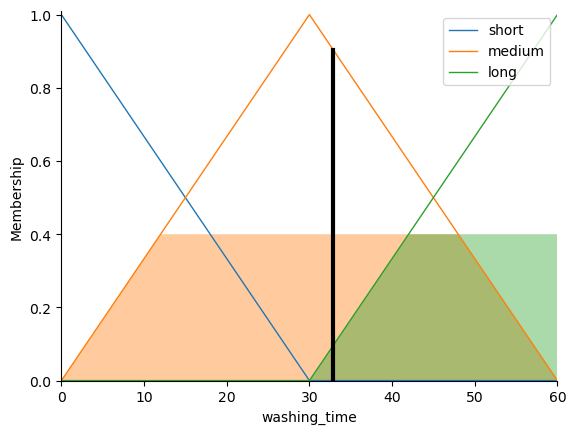

In [16]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

dirtiness=ctrl.Antecedent(np.arange(0,11,1),"dirtiness")
stain_type=ctrl.Antecedent(np.arange(0,11,1),"stain_type")
washing_time=ctrl.Consequent(np.arange(0,61,1),"washing_time")

dirtiness["low"]=fuzz.trimf(dirtiness.universe,[0,0,5])
dirtiness["medium"]=fuzz.trimf(dirtiness.universe,[0,5,10])
dirtiness["high"]=fuzz.trimf(dirtiness.universe,[5,10,10])

stain_type["low"]=fuzz.trimf(stain_type.universe,[0,0,5])
stain_type["medium"]=fuzz.trimf(stain_type.universe,[0,5,10])
stain_type["high"]=fuzz.trimf(stain_type.universe,[5,10,10])

washing_time["short"]=fuzz.trimf(washing_time.universe,[0,0,30])
washing_time["medium"]=fuzz.trimf(washing_time.universe,[0,30,60])
washing_time["long"]=fuzz.trimf(washing_time.universe,[30,60,60])

rule1=ctrl.Rule(dirtiness["low"] & stain_type["low"] , washing_time["short"])
rule2=ctrl.Rule(dirtiness["medium"] & stain_type["medium"] , washing_time["medium"])
rule3=ctrl.Rule(dirtiness["high"] & stain_type["high"] , washing_time["long"])

washing_ctrl=ctrl.ControlSystem([rule1,rule2,rule3])
washing_machine=ctrl.ControlSystemSimulation(washing_ctrl)

if __name__=="__main__":
    washing_machine.input["dirtiness"]=7
    washing_machine.input["stain_type"]=8
    
    washing_machine.compute()
    
    print("Washing Time : ",washing_machine.output["washing_time"])
    washing_time.view(sim=washing_machine)
    plt.legend(["short","medium","long"],loc="upper right")
    plt.show()

In [20]:
import random

# Genetic Algorithm parameters
population_size = 10
chromosome_length = 6
mutation_rate = 0.1
target_chromosome = "110110"

def generate_population(population_size, chromosome_length):
    return [''.join(random.choice('01') for _ in range(chromosome_length)) for _ in range(population_size)]

def fitness(chromosome):
    return sum(bit == target_bit for bit, target_bit in zip(chromosome, target_chromosome))

def crossover(parent1, parent2):
    crossover_point = random.randint(0, len(parent1) - 1)
    child1 = parent1[:crossover_point] + parent2[crossover_point:]
    child2 = parent2[:crossover_point] + parent1[crossover_point:]
    return child1, child2

def mutate(chromosome, mutation_rate):
    mutated_chromosome = ''.join(bit if random.random() > mutation_rate else random.choice('01') for bit in chromosome)
    return mutated_chromosome

def select_parents(population):
    parents = random.choices(population, weights=[fitness(chromosome) for chromosome in population], k=2)
    return parents[0], parents[1]

def genetic_algorithm(population_size, chromosome_length, mutation_rate, generations):
    population = generate_population(population_size, chromosome_length)
    for generation in range(generations):
        # Evaluate fitness
        fitness_scores = [fitness(chromosome) for chromosome in population]
        
        # Select parents and create offspring
        new_population = []
        for _ in range(population_size // 2):
            parent1, parent2 = select_parents(population)
            child1, child2 = crossover(parent1, parent2)
            child1 = mutate(child1, mutation_rate)
            child2 = mutate(child2, mutation_rate)

            new_population.extend([child1, child2])
        
        # Replace the old population with the new one
        population = new_population
        
        # Display the best chromosome in each generation
        best_chromosome = max(population, key=fitness)
        print(f"Generation {generation + 1}: Best Chromosome - {best_chromosome}, Fitness - {fitness(best_chromosome)}")
        
        # Check for convergence
        if fitness(best_chromosome) == len(target_chromosome):
            print("Target chromosome reached!")
            break

if __name__ == "__main__":
    genetic_algorithm(population_size, chromosome_length, mutation_rate, generations=50)


Generation 1: Best Chromosome - 010110, Fitness - 5
Generation 2: Best Chromosome - 010110, Fitness - 5
Generation 3: Best Chromosome - 110101, Fitness - 4
Generation 4: Best Chromosome - 110110, Fitness - 6
Target chromosome reached!


In [28]:
import random

population_size = 10
chromosome_length = 6
mutation_rate = 0.1
target_chromosome = "110110"

def generate_population(population_size, chromosome_length):
    return [''.join(random.choice('01') for _ in range(chromosome_length)) for _ in range(population_size)]

def fitness(chromosome):
    return sum(bit == target_bit for bit, target_bit in zip(chromosome, target_chromosome))

def crossover(parent1, parent2):
    crossover_point = random.randint(0, len(parent1) - 1)
    child1 = parent1[:crossover_point] + parent2[crossover_point:]
    child2 = parent2[:crossover_point] + parent1[crossover_point:]
    return child1, child2

def mutate(chromosome, mutation_rate):
    mutated_chromosome = ''.join(bit if random.random() > mutation_rate else random.choice('01') for bit in chromosome)
    return mutated_chromosome

def select_parents(population):
    parents = random.choices(population, weights=[fitness(chromosome) for chromosome in population], k=2)
    return parents[0], parents[1]

def genetic_algorithm(population_size, chromosome_length, mutation_rate, generations):
    population = generate_population(population_size, chromosome_length)
    for generation in range(generations):
        fitness_scores = [fitness(chromosome) for chromosome in population]
        new_population = []

        for _ in range(population_size // 2):
            parent1, parent2 = select_parents(population)
            child1, child2 = crossover(parent1, parent2)
            child1 = mutate(child1, mutation_rate)
            child2 = mutate(child2, mutation_rate)

            new_population.extend([child1, child2])

        population = new_population
        best_chromosome = max(population, key=fitness)
        print(f"Generation {generation + 1}: Best Chromosome - {best_chromosome}, Fitness - {fitness(best_chromosome)}")

        if fitness(best_chromosome) == len(target_chromosome):
            print("Target chromosome reached!")
            break

if __name__ == "__main__":
    genetic_algorithm(population_size, chromosome_length, mutation_rate, generations=50)


Generation 1: Best Chromosome - 110011, Fitness - 4
Generation 2: Best Chromosome - 110011, Fitness - 4
Generation 3: Best Chromosome - 110111, Fitness - 5
Generation 4: Best Chromosome - 110111, Fitness - 5
Generation 5: Best Chromosome - 110110, Fitness - 6
Target chromosome reached!


In [32]:
import random

population_size=10
chromosome_length=6
mutation_rate=0.1
target_chromosome="110110"

def generate_population(population_size,chromosome_length):
    return[''.join(random.choice('01') for _ in range(chromosome_length)) for _ in range(population_size)]

def fitness(chromosome):
    return sum(bit==target_bit for bit,target_bit in zip(chromosome,target_chromosome))

def crossover(parent1,parent2):
    crossover_point=random.randint(0,len(parent1)-1)
    child1=parent1[:crossover_point] + parent2[crossover_point:]
    child2=parent2[:crossover_point] + parent1[crossover_point:]
    return child1,child2

def mutate(chromosome,mutation_rate):
    mutated_chromosome=''.join(bit if random.random() > mutation_rate else random.choice('01') for bit in chromosome)
    return mutated_chromosome

def select_parents(population):
    parents=random.choices(population , weights=[fitness(chromosome) for chromosome in population],k=2)
    return parents[0],parents[1]

def genetic_algorithm(population_size,chromosome_length,mutation_rate,generations):
    population=generate_population(population_size,chromosome_length)
    for generation in range(generations):
        fitness_score=[fitness(chromosome) for chromosome in population]
        new_population=[]
        
        for _ in range(population_size //2):
            parent1,parent2=select_parents(population)
            child1,child2=crossover(parent1,parent2)
            child1=mutate(child1,mutation_rate)
            child2=mutate(child2,mutation_rate)
            
            new_population.extend([child1,child2])
            
        population=new_population
        best_chromosome=max(population,key=fitness)
        print(f"Generation {generation + 1} : Best chromosome - {best_chromosome}, Fitness - {fitness(best_chromosome)}")
        
        if fitness(best_chromosome) == len(target_chromosome):
            print("Target chromosme reached")
            break
            
if __name__=="__main__":
    genetic_algorithm(population_size,chromosome_length,mutation_rate,generations=50)

Generation 1 : Best chromosome - 010110, Fitness - 5
Generation 2 : Best chromosome - 111110, Fitness - 5
Generation 3 : Best chromosome - 010110, Fitness - 5
Generation 4 : Best chromosome - 110110, Fitness - 6
Target chromosme reached


In [40]:
import random

population_size=10
chromosome_length=6
mutation_rate=0.1
target_chromosome="110110"

def generate_population(population_size,chromosome_length):
    return[''.join(random.choice('01') for _ in range(chromosome_length)) for _ in range(population_size)]

def fitness(chromosome):
    return sum(bit==target_bit for bit,target_bit in zip(chromosome,target_chromosome))

def crossover(parent1,parent2):
    crossover_point=random.randint(0,len(parent1) - 1)
    child1=parent1[:crossover_point] + parent2[crossover_point:]
    child2=parent2[:crossover_point] + parent1[crossover_point:]
    return child1,child2

def mutate(chromosome,mutation_rate):
    mutated_chromosome=''.join(bit if random.random() > mutation_rate else random.choice('01') for bit in chromosome)
    return mutated_chromosome

def select_parents(population):
    parents=random.choices(population,weights=[fitness(chromosome) for chromosome in population],k=2)
    return parents[0],parents[1]

def genetic_algorithm(population_size,chromosome_length,mutation_rate,generations):
    population=generate_population(population_size,chromosome_length)
    for generation in range(generations):
        fitness_score=[fitness(chromosome) for chromosome in population]
        new_population=[]
        
        for _ in range(population_size //2):
            parent1,parent2=select_parents(population)
            child1,child2=crossover(parent1,parent2)
            child1=mutate(child1,mutation_rate)
            child2=mutate(child2,mutation_rate)
            
            new_population.extend([child1,child2])
        population=new_population
        best_chromosome=max(population,key=fitness)
        print(f"Generation {generation + 1} : Best Chromosome - {best_chromosome} , Fitness - {fitness(best_chromosome)}")
        
        if fitness(best_chromosome)==len(target_chromosome):
            print("Target chromosome has reached!")
            break
            
if __name__=="__main__":
    genetic_algorithm(population_size,chromosome_length,mutation_rate,generations=50)

Generation 1 : Best Chromosome - 100110 , Fitness - 5
Generation 2 : Best Chromosome - 110110 , Fitness - 6
Target chromosome has reached!


In [1]:
import numpy as np

# Define the objective function to maximize
def objective_function(x):
    return x**2

# Genetic Algorithm parameters
population_size = 50
generations = 100
mutation_rate = 0.1

# Initialization: Generate a random population
population = np.random.uniform(-10, 10, size=population_size)

# Main loop
for generation in range(generations):
    # Evaluate the fitness of each individual in the population
    fitness = objective_function(population)
    
    # Select the top individuals based on fitness
    sorted_indices = np.argsort(fitness)[::-1]
    selected_population = population[sorted_indices[:population_size]]
    
    # Crossover: Create new individuals by combining pairs of selected individuals
    crossover_population = np.random.choice(selected_population, size=population_size)
    
    # Mutation: Introduce random changes to some individuals
    mutation_mask = np.random.rand(population_size) < mutation_rate
    mutation_population = np.random.uniform(-1, 1, size=population_size)
    crossover_population[mutation_mask] += mutation_population[mutation_mask]
    
    # Replace the old population with the new one
    population = crossover_population
    
# Find the best individual in the final population
best_individual_index = np.argmax(objective_function(population))
best_x = population[best_individual_index]
# Print the result
print(f"Optimal x: {best_x}")
print(f"Optimal f(x): {objective_function(best_x)}")

Optimal x: -5.54041423399109
Optimal f(x): 30.696189884211073


In [2]:
import numpy as np

# Define the objective function to maximize
def objective_function(x):
    return -x**2 + 4*x - 4

# Genetic Algorithm parameters
population_size = 50
generations = 100
mutation_rate = 0.1

# Initialization: Generate a random population
population = np.random.uniform(-10, 10, size=population_size)

# Main loop
for generation in range(generations):
    # Evaluate the fitness of each individual in the population
    fitness = objective_function(population)
    
    # Select the top individuals based on fitness
    sorted_indices = np.argsort(fitness)[::-1]
    selected_population = population[sorted_indices[:population_size]]
    
    # Crossover: Create new individuals by combining pairs of selected individuals
    crossover_population = np.random.choice(selected_population, size=population_size)
    
    # Mutation: Introduce random changes to some individuals
    mutation_mask = np.random.rand(population_size) < mutation_rate
    mutation_population = np.random.uniform(-1, 1, size=population_size)
    crossover_population[mutation_mask] += mutation_population[mutation_mask]
    
    # Replace the old population with the new one
    population = crossover_population
    
# Find the best individual in the final population
best_individual_index = np.argmax(objective_function(population))
best_x = population[best_individual_index]
# Print the result
print(f"Optimal x: {best_x}")
print(f"Optimal f(x): {objective_function(best_x)}")

Optimal x: 3.1370123119122573
Optimal f(x): -1.2927969974400568
